In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
from collections import Counter


In [11]:
df=pd.read_csv('Life Expectancy Data.csv')
pd.set_option("display.max_columns",None)
old_colnames=df.columns
new_colnames=['Country','Year','Status','Life_expectancy','Adult_Mortality','infant_deaths','Alcohol','percentage_expenditure','Hepatitis_B','Measles','BMI','under-five_deaths','Polio','Total_expenditure','Diphtheria','HIV_AIDS','GDP','Population','thinness_1-19_years','thinness_5-9_years','Income_composition_of_resources','Schooling']
df=df.rename(columns=dict(zip(old_colnames,new_colnames)))
df

Country  Year      Status  Life_expectancy  Adult_Mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  \
0                62     0.01               71.279624         65.0     1154   
1                64     0.01               73.523582         62.0      492   
2                66     0.01               73.219243         64.0      430   
3                69     0.01               78.184215         67.0     2787   
4                71     0.01                7.097109         68.0     3013   
...             ...      ...                     ...          ...      ...   
2933             27     4.36                0.000000         68.0       31   
2934             26     4.06                0.000000          7.0      998   
2935             25     4.43                0.000000         73.0      304   
2936             25     1.72                0.000000         76.0      529   
2937             24     1.68                0.000000         79.0     1483   

       BMI  under-five_deaths  Polio  Total_expenditure  Diphtheria  HIV_AIDS  \
0     19.1                 83    6.0               8.16        65.0       0.1   
1     18.6                 86   58.0               8.18        62.0       0.1   
2     18.1                 89   62.0               8.13        64.0       0.1   
3     17.6                 93   67.0               8.52        67.0       0.1   
4     17.2                 97   68.0               7.87        68.0       0.1   
...    ...                ...    ...                ...         ...       ...   
2933  27.1                 42   67.0               7.13        65.0      33.6   
2934  26.7                 41    7.0               6.52        68.0      36.7   
2935  26.3                 40   73.0               6.53        71.0      39.8   
2936  25.9                 39   76.0               6.16        75.0      42.1   
2937  25.5                 39   78.0               7.10        78.0      43.5   

             GDP  Population  thinness_1-19_years  thinness_5-9_years  \
0     584.259210  33736494.0                 17.2                17.3   
1     612.696514    327582.0                 17.5                17.5   
2     631.744976  31731688.0                 17.7                17.7   
3     669.959000   3696958.0                 17.9                18.0   
4      63.537231   2978599.0                 18.2                18.2   
...          ...         ...                  ...                 ...   
2933  454.366654  12777511.0                  9.4                 9.4   
2934  453.351155  12633897.0                  9.8                 9.9   
2935   57.348340    125525.0                  1.2                 1.3   
2936  548.587312  12366165.0                  1.6                 1.7   
2937  547.358878  12222251.0                 11.0                11.2   

      Income_composition_of_resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...   

In [12]:
df.head()

Country  Year      Status  Life_expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles   BMI  \
0             62     0.01               71.279624         65.0     1154  19.1   
1             64     0.01               73.523582         62.0      492  18.6   
2             66     0.01               73.219243         64.0      430  18.1   
3             69     0.01               78.184215         67.0     2787  17.6   
4             71     0.01                7.097109         68.0     3013  17.2   

   under-five_deaths  Polio  Total_expenditure  Diphtheria  HIV_AIDS  \
0                 83    6.0               8.16        65.0       0.1   
1                 86   58.0               8.18        62.0       0.1   
2                 89   62.0               8.13        64.0       0.1   
3                 93   67.0               8.52        67.0       0.1   
4                 97   68.0               7.87        68.0       0.1   

          GDP  Population  thinness_1-19_years  thinness_5-9_years  \
0  584.259210  33736494.0                 17.2                17.3   
1  612.696514    327582.0                 17.5                17.5   
2  631.744976  31731688.0                 17.7                17.7   
3  669.959000   3696958.0                 17.9                18.0   
4   63.537231   2978599.0                 18.2                18.2   

   Income_composition_of_resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

In [13]:
dm=df.groupby(df["Country"]).mean()
dm

Year  Life_expectancy  Adult_Mortality  \
Country                                                                        
Afghanistan                         2007.5         58.19375         269.0625   
Albania                             2007.5         75.15625          45.0625   
Algeria                             2007.5         73.61875         108.1875   
Angola                              2007.5         49.01875         328.5625   
Antigua and Barbuda                 2007.5         75.05625         127.5000   
...                                    ...              ...              ...   
Venezuela (Bolivarian Republic of)  2007.5         73.38750         163.0000   
Viet Nam                            2007.5         74.77500         126.5625   
Yemen                               2007.5         63.86250         211.8125   
Zambia                              2007.5         53.90625         354.3125   
Zimbabwe                            2007.5         50.48750         462.3750   

                                    infant_deaths   Alcohol  \
Country                                                       
Afghanistan                               78.2500  0.014375   
Albania                                    0.6875  4.848750   
Algeria                                   20.3125  0.406667   
Angola                                    83.7500  5.740667   
Antigua and Barbuda                        0.0000  7.949333   
...                                           ...       ...   
Venezuela (Bolivarian Republic of)         9.3750  7.420000   
Viet Nam                                  29.1875  3.087333   
Yemen                                     39.3750  0.047333   
Zambia                                    33.4375  2.239333   
Zimbabwe                                  26.5625  4.482000   

                                    percentage_expenditure  Hepatitis_B  \
Country                                                                   
Afghanistan                                      34.960110    64.562500   
Albania                                         193.259091    98.000000   
Algeria                                         236.185241    78.000000   
Angola                                          102.100268    70.222222   
Antigua and Barbuda                            1001.585226    98.266667   
...                                                    ...          ...   
Venezuela (Bolivarian Republic of)                0.000000    66.250000   
Viet Nam                                          0.000000    87.538462   
Yemen                                             0.000000    55.687500   
Zambia                                           89.650407    69.818182   
Zimbabwe                                         20.364271    70.562500   

                                      Measles       BMI  under-five_deaths  \
Country                                                                      
Afghanistan                         2362.2500  15.51875           107.5625   
Albania                               53.3750  49.06875             0.9375   
Algeria                             1943.8750  48.74375            23.5000   
Angola                              3561.3125  18.01875           132.6250   
Antigua and Barbuda                    0.0000  38.42500             0.0000   
...                                       ...       ...                ...   
Venezuela (Bolivarian Republic of)   165.0000  54.48750            10.7500   
Viet Nam                            4232.9375  11.18750            36.5000   
Yemen                               2761.1875  33.48750            51.6250   
Zambia                              6563.8125  17.45000            52.3750   
Zimbabwe                             923.0000  25.13750            40.8125   

                                      Polio  Total_expenditure  Diphtheria  \
Country                                                                      
Afghanistan                   

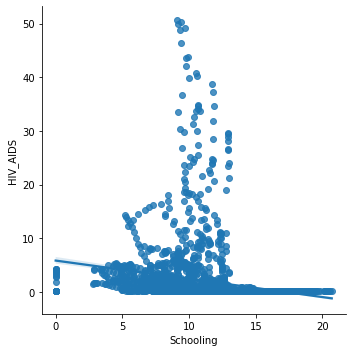

In [14]:
sns.lmplot(x='Schooling',y='HIV_AIDS',data=df)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Life_expectancy', ylabel='Density'>

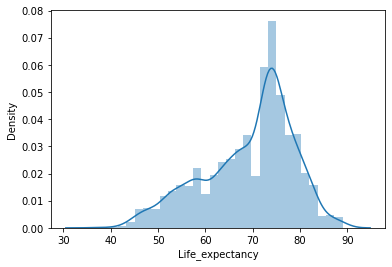

In [15]:
sns.distplot(df['Life_expectancy'])

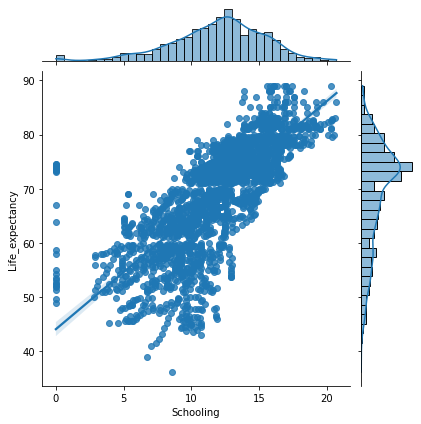

In [16]:
sns.jointplot(x='Schooling', y='Life_expectancy', data=df, kind='reg')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Life_expectancy', ylabel='Density'>

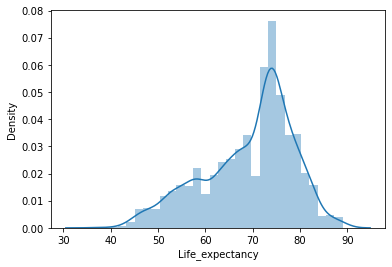

In [17]:
sns.distplot(df['Life_expectancy'],kde=True)

In [18]:
df.isnull().any()

Country                            False
Year                               False
Status                             False
Life_expectancy                     True
Adult_Mortality                     True
infant_deaths                      False
Alcohol                             True
percentage_expenditure             False
Hepatitis_B                         True
Measles                            False
BMI                                 True
under-five_deaths                  False
Polio                               True
Total_expenditure                   True
Diphtheria                          True
HIV_AIDS                           False
GDP                                 True
Population                          True
thinness_1-19_years                 True
thinness_5-9_years                  True
Income_composition_of_resources     True
Schooling                           True
dtype: bool

In [19]:
# c=df.drop(['Country','Year','Status'], axis=1).fillna(method='ffill')
# c

<AxesSubplot:xlabel='Status', ylabel='Life_expectancy'>

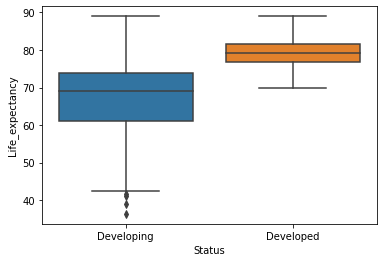

In [20]:
sns.boxplot(x="Status",y="Life_expectancy",data=df)

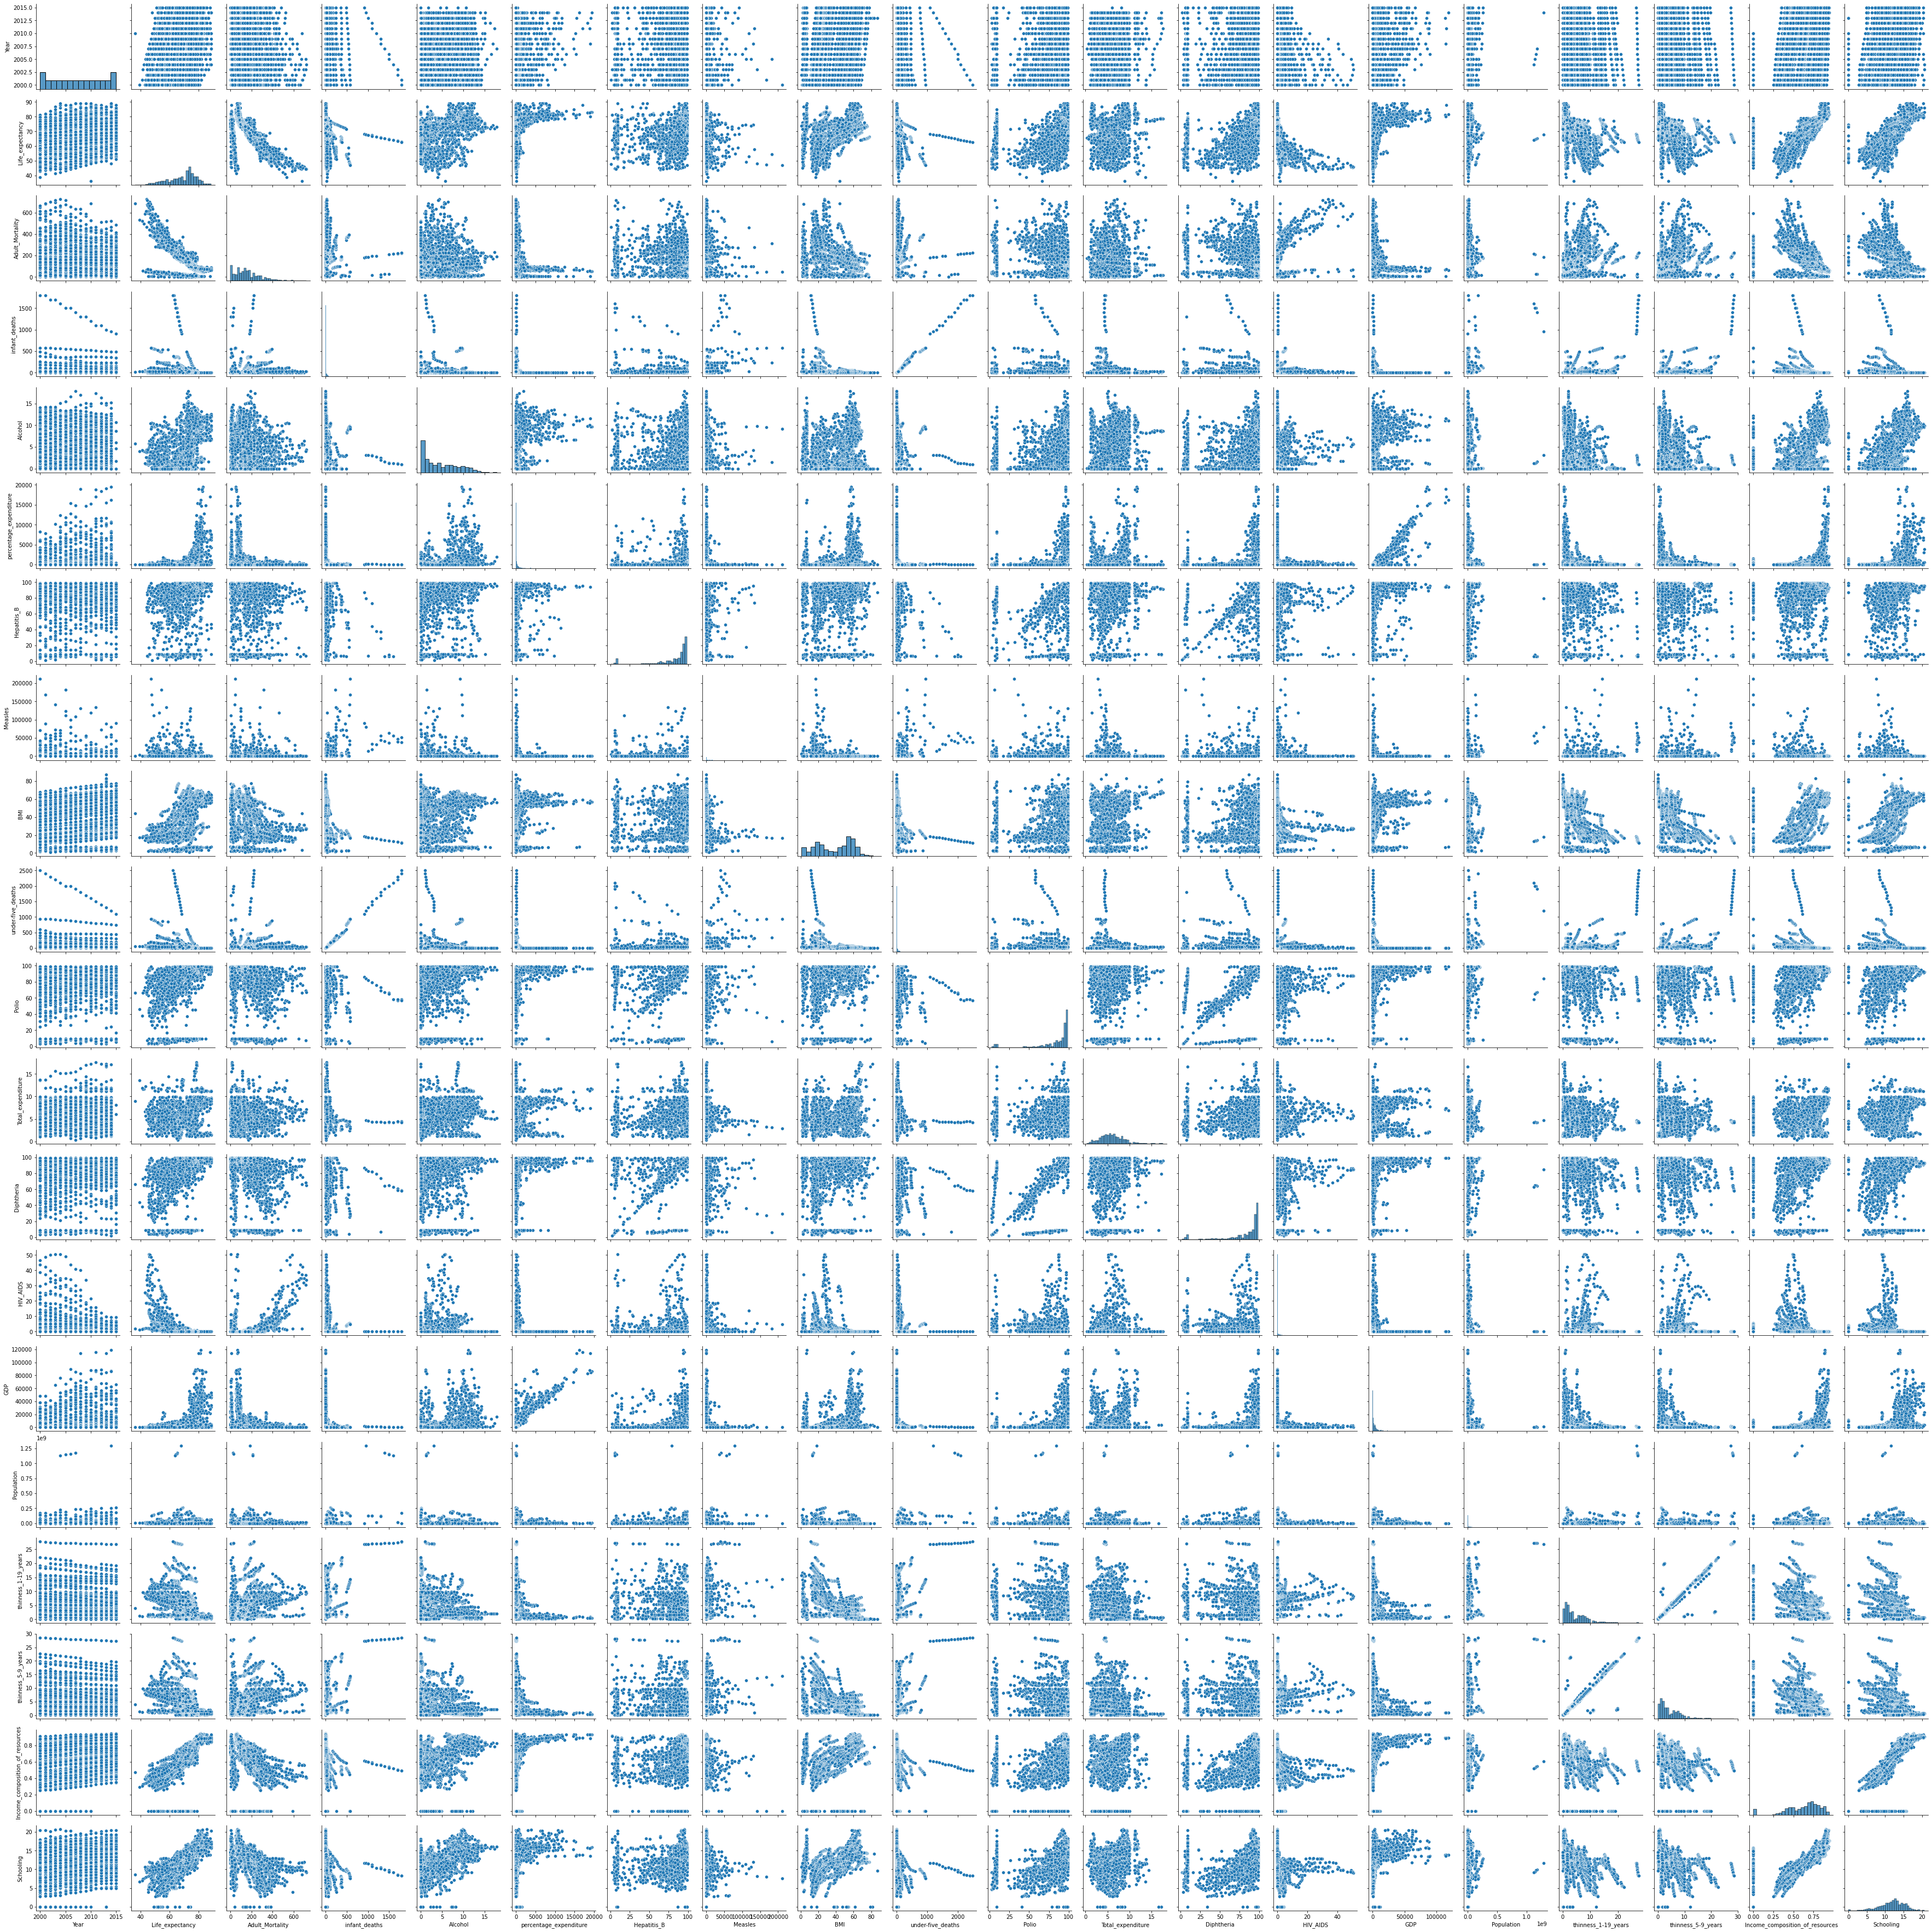

In [23]:
sns.pairplot(df)

In [21]:
x= dict(Counter(df['Status']))
x

{'Developing': 2426, 'Developed': 512}

([<matplotlib.patches.Wedge at 0x2062dd7ee50>,
 [Text(-0.939223082687329, 0.5725906050113911, 'Developing'),
  Text(0.9392231362971265, -0.572590517074977, 'Developed')],
 [Text(-0.5123034996476339, 0.3123221481880315, '82.57%'),
  Text(0.5123035288893416, -0.3123221002227147, '17.43%')])

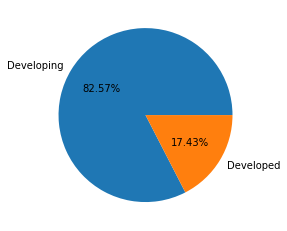

In [22]:
plt.pie(x.values(),labels=x.keys(),autopct='%1.2f%%')

# handling missing data

In [23]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV_AIDS                             0
GDP                                448
Population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [24]:
df.corr()['Life_expectancy'].sort_values()

Adult_Mortality                   -0.696359
HIV_AIDS                          -0.556556
thinness_1-19_years               -0.477183
thinness_5-9_years                -0.471584
under-five_deaths                 -0.222529
infant_deaths                     -0.196557
Measles                           -0.157586
Population                        -0.021538
Year                               0.170033
Total_expenditure                  0.218086
Hepatitis_B                        0.256762
percentage_expenditure             0.381864
Alcohol                            0.404877
GDP                                0.461455
Polio                              0.465556
Diphtheria                         0.479495
BMI                                0.567694
Income_composition_of_resources    0.724776
Schooling                          0.751975
Life_expectancy                    1.000000
Name: Life_expectancy, dtype: float64

In [25]:
print("Mean of Life_expectancy column per Measles")
df.groupby('Measles').mean()['Life_expectancy']

Mean of Life_expectancy column per Measles


Measles
0         71.635766
1         71.423077
2         72.810294
3         71.911364
4         71.633333
            ...    
133802    57.900000
141258    48.100000
168107    47.400000
182485    54.300000
212183    47.100000
Name: Life_expectancy, Length: 958, dtype: float64

In [26]:
Measles_avg = df.groupby('Measles').mean()['Life_expectancy']

In [27]:
# Handling missing data

In [28]:
def fill_Life_expectancy(Measles,Life_expectancy):
   
    if np.isnan(Life_expectancy):
        return Measles_avg[Measles]
    else:
        return Life_expectancy

In [29]:
df['Life_expectancy'] = df.apply(lambda x: (x['Measles'], x['Life_expectancy']), axis=1)

In [30]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV_AIDS                             0
GDP                                448
Population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [31]:
df.corr()['Adult_Mortality'].sort_values()

Income_composition_of_resources   -0.457626
Schooling                         -0.454612
BMI                               -0.387017
GDP                               -0.296049
Diphtheria                        -0.275131
Polio                             -0.274823
percentage_expenditure            -0.242860
Alcohol                           -0.195848
Hepatitis_B                       -0.162476
Total_expenditure                 -0.115281
Year                              -0.079052
Population                        -0.013647
Measles                            0.031176
infant_deaths                      0.078756
under-five_deaths                  0.094146
thinness_1-19_years                0.302904
thinness_5-9_years                 0.308457
HIV_AIDS                           0.523821
Adult_Mortality                    1.000000
Name: Adult_Mortality, dtype: float64

In [32]:
print("Mean of Adult Mortality column per HIV/AIDS")
df.groupby('HIV_AIDS').mean()['Adult_Mortality']

Mean of Adult Mortality column per HIV/AIDS


HIV_AIDS
0.1     112.380011
0.2     155.411290
0.3     169.260870
0.4     157.565217
0.5     181.071429
           ...    
48.8    568.000000
49.1     63.000000
49.9    587.000000
50.3     69.000000
50.6      6.000000
Name: Adult_Mortality, Length: 200, dtype: float64

In [33]:
HIV_AIDS_avg = df.groupby('HIV_AIDS').mean()['Adult_Mortality']

In [34]:
def fill_Adult_Mortality(HIV_AIDS,Adult_Mortality):
   
    if np.isnan(Adult_Mortality):
        return HIV_AIDS_avg[HIV_AIDS]
    else:
        return Adult_Mortality

In [35]:
df['Adult_Mortality'] = df.apply(lambda x: (x['HIV_AIDS'], x['Adult_Mortality']), axis=1)

In [36]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV_AIDS                             0
GDP                                448
Population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

<AxesSubplot:xlabel='Status', ylabel='count'>

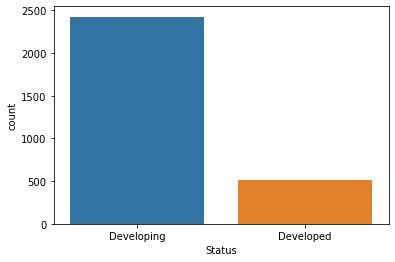

In [37]:
sns.countplot(x='Status',data=df)

In [38]:
df.groupby('Status').describe()

Year                                                           \
             count         mean       std     min      25%     50%      75%   
Status                                                                        
Developed    512.0  2007.500000  4.614281  2000.0  2003.75  2007.5  2011.25   
Developing  2426.0  2007.522671  4.614690  2000.0  2004.00  2008.0  2012.00   

                   infant_deaths                                              \
               max         count       mean         std  min  25%  50%   75%   
Status                                                                         
Developed   2015.0         512.0   1.494141    4.585774  0.0  0.0  0.0   1.0   
Developing  2015.0        2426.0  36.384171  128.942509  0.0  1.0  6.0  28.0   

                   Alcohol                                                    \
               max   count      mean       std   min     25%    50%      75%   
Status                                                                         
Developed     28.0   484.0  9.826736  2.765858  0.01  8.6175  10.32  11.6975   
Developing  1800.0  2260.0  3.484119  3.347537  0.01  0.5175   2.56   5.7500   

                  percentage_expenditure                                 \
              max                  count         mean          std  min   
Status                                                                    
Developed   15.19                  512.0  2703.600380  3824.200588  0.0   
Developing  17.87                 2426.0   323.470285   846.655356  0.0   

                                                             Hepatitis_B  \
                  25%         50%          75%           max       count   
Status                                                                     
Developed   92.904052  846.615644  4102.863046  19479.911610       339.0   
Developing   3.616102   48.431829   257.702204   9748.636237      2046.0   

                                                              Measles  \
                 mean        std  min   25%   50%   75%   max   count   
Status                                                                  
Developed   88.041298  20.489240  2.0  89.0  95.0  97.0  99.0   512.0   
Developing  79.763930  25.564884  1.0  75.0  91.0  97.0  99.0  2426.0   

                                                                        \
                   mean           std  min  25%   50%    75%       max   
Status                                                                   
Developed    499.005859   2529.084588  0.0  0.0  12.0   96.5   33812.0   
Developing  2824.926216  12528.811419  0.0  0.0  18.0  514.5  212183.0   

               BMI                                                        \
             count       mean        std  min     25%    50%   75%   max   
Status                                                                     
Developed    512.0  51.803906  17.196829  3.2  53.775  57.45  61.3  69.6   
Developing  2392.0  35.435326  19.425091  1.0  18.300  35.20  53.2  87.3   

           under-five_deaths                                              \
                       count       mean         std  min  25%  50%   75%   
Status                                                                     
Developed              512.0   1.810547    5.384006  0.0  0.0  0.0   2.0   
Developing            2426.0  50.525144  175.379909  0.0  1.0  7.0  39.0   

                     Polio                                                     \
               max   count       mean        std  min   25%   50%   75%   max   
Status                                                                          
Developed     33.0   512.0  93.736328  10.783713  9.0  93.0  96.0  98.0  99.0   
Developing  2500.0  2407.0  80.170752  24.671531  3.0  74.0  91.0  97.0  99.0   

           Total_expenditure                                                   \
                       count      mean       std   min     25%    50%    

In [39]:
# df=df.fillna(method='ffill')

In [40]:
# checking null data usingg heatmap


In [41]:

# sns.boxplot(x='Status',y='Life_expectancy',data=df)

<AxesSubplot:>

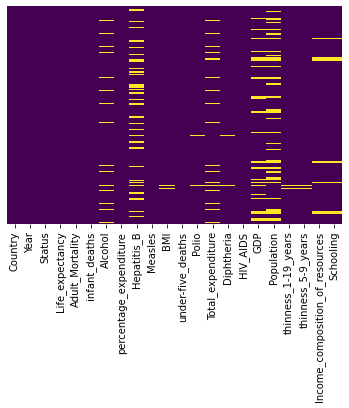

In [42]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [43]:
# df.iplot(x='GDP',y='Life_expectancy',z='Population',kind='surface',color='Red')

In [44]:
pip install plotly

In [45]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [46]:
from plotly import __version__
print(__version__)

5.14.1


In [47]:
import cufflinks as cf

In [48]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [49]:
init_notebook_mode(connected=True)

In [50]:
cf.go_offline()

In [51]:
a=df[['Adult_Mortality','Life_expectancy','infant_deaths']].head()
a

Adult_Mortality Life_expectancy  infant_deaths
0    (0.1, 263.0)    (1154, 65.0)             62
1    (0.1, 271.0)     (492, 59.9)             64
2    (0.1, 268.0)     (430, 59.9)             66
3    (0.1, 272.0)    (2787, 59.5)             69
4    (0.1, 275.0)    (3013, 59.2)             71

In [52]:
a.iplot(kind='scatter')

In [53]:
a.iplot(kind='bar')

In [54]:
 df.iplot(x='GDP',y='Life_expectancy',z='Population',kind='surface',color='Red')

In [55]:
df['Alcohol'].mean()

4.6028607871720375

In [56]:
df=df.fillna(method='ffill')

<AxesSubplot:>

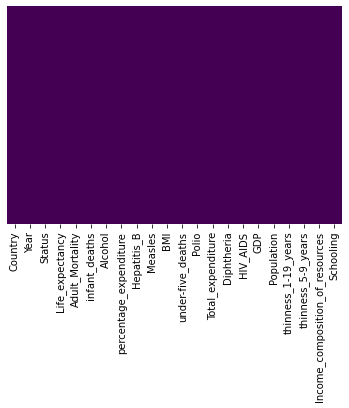

In [57]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [58]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness_1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [59]:
# sns.lmplot(x='Schooling',y='Life_expectancy',data=df,col='Status')

In [61]:
# g= sns.FacetGrid(df,hue='Status',palette='coolwarm',height=7,aspect=2)
# g = g.map(plt.hist,'Life_expectancy',bins=60,alpha=0.7)

In [ ]:
df[df['Life_expectancy']>85]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
 X=df.drop(['Country','Year','Status','Life_expectancy'], axis=1)
y=df['Life_expectancy']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

In [ ]:
lm.coef_

In [ ]:
predictions=lm.predict(X_test)

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
# logmodel.fit(X_train,y_train,sample_weight=None)

In [ ]:
# predictions = logmodel.predict(X_test)

In [ ]:
# logmodel.coef_

# Next workbook

In [ ]:
sns.lmplot()

In [ ]:
import nltk

In [ ]:
 # nltk.download_shell()

In [ ]:
# messages=[line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [ ]:
# print(len(messages))

In [9]:
df

Country  Year      Status  Life_expectancy  Adult_Mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  \
0                62     0.01               71.279624         65.0     1154   
1                64     0.01               73.523582         62.0      492   
2                66     0.01               73.219243         64.0      430   
3                69     0.01               78.184215         67.0     2787   
4                71     0.01                7.097109         68.0     3013   
...             ...      ...                     ...          ...      ...   
2933             27     4.36                0.000000         68.0       31   
2934             26     4.06                0.000000          7.0      998   
2935             25     4.43                0.000000         73.0      304   
2936             25     1.72                0.000000         76.0      529   
2937             24     1.68                0.000000         79.0     1483   

       BMI  under-five_deaths  Polio  Total_expenditure  Diphtheria  HIV_AIDS  \
0     19.1                 83    6.0               8.16        65.0       0.1   
1     18.6                 86   58.0               8.18        62.0       0.1   
2     18.1                 89   62.0               8.13        64.0       0.1   
3     17.6                 93   67.0               8.52        67.0       0.1   
4     17.2                 97   68.0               7.87        68.0       0.1   
...    ...                ...    ...                ...         ...       ...   
2933  27.1                 42   67.0               7.13        65.0      33.6   
2934  26.7                 41    7.0               6.52        68.0      36.7   
2935  26.3                 40   73.0               6.53        71.0      39.8   
2936  25.9                 39   76.0               6.16        75.0      42.1   
2937  25.5                 39   78.0               7.10        78.0      43.5   

             GDP  Population  thinness_1-19_years  thinness_5-9_years  \
0     584.259210  33736494.0                 17.2                17.3   
1     612.696514    327582.0                 17.5                17.5   
2     631.744976  31731688.0                 17.7                17.7   
3     669.959000   3696958.0                 17.9                18.0   
4      63.537231   2978599.0                 18.2                18.2   
...          ...         ...                  ...                 ...   
2933  454.366654  12777511.0                  9.4                 9.4   
2934  453.351155  12633897.0                  9.8                 9.9   
2935   57.348340    125525.0                  1.2                 1.3   
2936  548.587312  12366165.0                  1.6                 1.7   
2937  547.358878  12222251.0                 11.0                11.2   

      Income_composition_of_resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...   

In [3]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness_1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [13]:
dm=df.drop(['Country','Year'],axis=1)

In [14]:
dm

Status  Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  \
0     Developing             65.0            263.0             62     0.01   
1     Developing             59.9            271.0             64     0.01   
2     Developing             59.9            268.0             66     0.01   
3     Developing             59.5            272.0             69     0.01   
4     Developing             59.2            275.0             71     0.01   
...          ...              ...              ...            ...      ...   
2933  Developing             44.3            723.0             27     4.36   
2934  Developing             44.5            715.0             26     4.06   
2935  Developing             44.8             73.0             25     4.43   
2936  Developing             45.3            686.0             25     1.72   
2937  Developing             46.0            665.0             24     1.68   

      percentage_expenditure  Hepatitis_B  Measles   BMI  under-five_deaths  \
0                  71.279624         65.0     1154  19.1                 83   
1                  73.523582         62.0      492  18.6                 86   
2                  73.219243         64.0      430  18.1                 89   
3                  78.184215         67.0     2787  17.6                 93   
4                   7.097109         68.0     3013  17.2                 97   
...                      ...          ...      ...   ...                ...   
2933                0.000000         68.0       31  27.1                 42   
2934                0.000000          7.0      998  26.7                 41   
2935                0.000000         73.0      304  26.3                 40   
2936                0.000000         76.0      529  25.9                 39   
2937                0.000000         79.0     1483  25.5                 39   

      Polio  Total_expenditure  Diphtheria  HIV_AIDS         GDP  Population  \
0       6.0               8.16        65.0       0.1  584.259210  33736494.0   
1      58.0               8.18        62.0       0.1  612.696514    327582.0   
2      62.0               8.13        64.0       0.1  631.744976  31731688.0   
3      67.0               8.52        67.0       0.1  669.959000   3696958.0   
4      68.0               7.87        68.0       0.1   63.537231   2978599.0   
...     ...                ...         ...       ...         ...         ...   
2933   67.0               7.13        65.0      33.6  454.366654  12777511.0   
2934    7.0               6.52        68.0      36.7  453.351155  12633897.0   
2935   73.0               6.53        71.0      39.8   57.348340    125525.0   
2936   76.0               6.16        75.0      42.1  548.587312  12366165.0   
2937   78.0               7.10        78.0      43.5  547.358878  12222251.0   

      thinness_1-19_years  thinness_5-9_years  \
0                    17.2                17.3   
1                    17.5                17.5   
2                    17.7                17.7   
3                    17.9                18.0   
4                    18.2                18.2   
...                   ...                 ...   
2933                  9.4                 9.4   
2934                  9.8                 9.9   
2935                  1.2                 1.3   
2936                  1.6                 1.7   
2937                 11.0                11.2   

      Income_composition_of_resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937         

In [15]:
X=df.drop(columns=['Status'])
y=df['Status']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [19]:
model=DecisionTreeClassifier()

In [20]:
model.fit(X_train,y_train)

ValueError: could not convert string to float: 'Bosnia and Herzegovina'